<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [12]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train, test_size=0.4, random_state=0)

In [14]:
clf = SVC(C=100,gamma=0.001)
clf.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [15]:
import math
alphas = [i for i in list(clf.dual_coef_)]
def decision_function(X_cv):
  classes = []
  for xq in X_cv:
    sum = 0
    for i , j in enumerate(clf.support_vectors_):
      dist = np.linalg.norm(j - xq) 
      sum = sum + (alphas[0][i]*math.exp(-0.001*np.square(dist)))
    classes.extend(sum+clf.intercept_) 
  return classes    

In [16]:
d_fun = decision_function(X_cv)
print(d_fun[0:5])

[-4.059409504510256, -2.323440307294163, -0.7630431048146846, 1.8841593841742252, 1.0122689248729415]


In [17]:
f_cv = [i for i in clf.decision_function(X_cv)]
print(f_cv[0:5])

[-4.059409504510256, -2.323440307294163, -0.7630431048146846, 1.8841593841742252, 1.0122689248729415]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>



> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

## TASK F

In [18]:
def initialize_weights():
  w=np.zeros(1)
  b=0
  return w,b

import math
def sigmoid(z):
  sig = 1/(1 + math.exp(-z))
  
  return sig

def logloss(y_true,y_pred):
  n = len(y_true)
  loss = 0
  for i in range(n):
    loss +=  (y_true[i] *math.log(y_pred[i],10)) + (1-y_true[i])*math.log((1-y_pred[i]),10)
  log_loss = -loss/n  
    #'''In this function, we will compute log loss '''

  return log_loss

def gradient_dw(x,y,w,b,alpha,N):
  y1 = np.dot(w.T,x) + b
  sig = sigmoid(y1)
  dw = x*(y - sig) -(alpha/N)*w.T

  return dw  

def gradient_db(x,y,w,b):
   y1 = np.dot(w.T,x) + b
   sig = sigmoid(y1)

   db = y - sig
     #'''In this function, we will compute gradient w.r.to b '''
   return db
      

In [42]:
def train(X_train,y_train,epochs,alpha,eta0):
  train_loss  = list()
  w,b = initialize_weights()
  N = len(X_train)
  for i in range(epochs):
    for i in range(len(X_train)):
      dw = gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
      db = gradient_db(X_train[i],y_train[i],w,b)
      w = w + eta0*dw
      b = b + eta0*db

    y_train_pred = []
    for i in range(len(X_train)):
      z = np.dot(w.T,X_train[i]) + b
      sig = sigmoid(z)
      y_train_pred.append(sig)
    train_loss.append(logloss(y_train,y_train_pred))   
   
  return w,b,train_loss   

In [43]:
f_train = [i for i in clf.decision_function(X_train)]


N_plus = 0
N_minus = 0
for i in y_train:
  if i == 1:
    N_plus +=1
  else:
    N_minus +=1  

y_train = [(N_plus+1)/(N_plus+2) if i == 1 else 1/(N_minus+2) for i in y_train]

import pandas as pd 
data = {'f_train':f_train, 'y_train':y_train}  
df = pd.DataFrame(data) 
x_train = df['f_train']
y_train = df['y_train']


alpha=0.0001
eta0=0.0001
N=len(x_train)
epochs=100

w,b,train_loss=train(x_train,y_train,epochs,alpha,eta0)


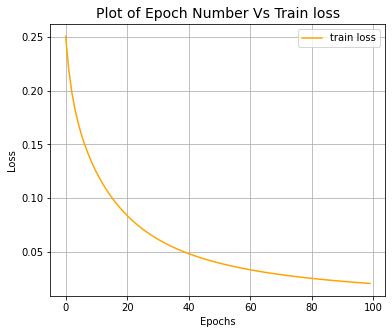

In [44]:
epoch = np.arange(100)
import matplotlib.pyplot as plt
plt.figure( figsize=(6,5))
plt.grid()
plt.plot(epoch,train_loss,color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Plot of Epoch Number Vs Train loss',fontsize = 14)
plt.legend(['train loss'])
plt.show()

In [40]:
print(w,b)

[0.34062765] -2.851242297812991


In [41]:
f_test = [i for i in decision_function(X_test)]

for i in range(10):
  print(f'P(Y=1|X_test{i}) = {round((1/(1 + math.exp(-(w*f_test[i]+b)))),3)}')


P(Y=1|X_test0) = 0.017
P(Y=1|X_test1) = 0.055
P(Y=1|X_test2) = 0.031
P(Y=1|X_test3) = 0.052
P(Y=1|X_test4) = 0.021
P(Y=1|X_test5) = 0.096
P(Y=1|X_test6) = 0.037
P(Y=1|X_test7) = 0.029
P(Y=1|X_test8) = 0.02
P(Y=1|X_test9) = 0.061
